In [ ]:
#================================================= NAME ==============================================#

'''
@RAJENDRA SINGH
'''

In [ ]:
#================================================= CONCEPT ==============================================#

'''
-> Here, Representation of floating point number is(Which is the genotype for this question):
    1) first position is reserved for sign of number
    2) fouth position is reserved for decimal point in number
    3) other places are occupied by 0s and 1s (similar to actual representation of fractional binary number)
-> For crossover and mutaion I used simple string manipulation.
-> For converting genotype to phenotype, find j such that, it is equal to int 
   form of genotype. Do, F = j-(2^63)*2.04/(2^63). We can reverse above processor 
   get genotype from phenotype
'''

In [15]:
#================================================= IMPOTRS ==============================================#
import random
import string
import math
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#================================================= GENE ==============================================#
GENOTYPE="01"

In [17]:
#================================================= LENGTH ==============================================#
len_popu=10

In [18]:
#=============================== FUN TO CONVERT BINARY STRING TO FLOAT ====================================#
def binary_to_floltingPoint(string):
	N=float(string)
	N1=int(N)
	N2=N%1
	N2=int(N2*1000000)
	string1=str(N1)
	N1=int(string1,2)
	string2=str(N2)
	p=2
	N2=0
	for i in range(len(string2)):
		N2=N2+(int(string2,10)/p)
		p=p*2
	N=N1+(0.1*N2)
	N=N-(N%0.01)
	return N

In [19]:
#=============================== FUN TO CONVERT FLOAT TO BINARY STRING ====================================#
def floltingPoint_to_binary(N):
	string=[]
	string1=[]
	N1=int(N)
	N2=N%1
	c=0
	while(N1>0):
		r=N1%2
		string.append(str(r))
		N1=N1/2
		c+=1
	i=c-1
	while(i>=0):
		string1.append(string[i])
		i-=1
	string1.append('.')
	for i in range(6):
		N2=N2*2
		N3=int(N2)
		string1.append(str(N3))
		N2=N2%1
	string1="".join(string1)
	return string1	

In [20]:
#=============================== FUN TO POPULATE INIT POPULATION ====================================#
def POPULATE_POPU(N):
	while True:
		string=[]
		string.append(random.choice("+-"))
		for i in range(1,10):
			if(i==3):
				string.append('.')
			else:
				string.append(random.choice(GENOTYPE))
		string="".join(string)	
		N=binary_to_floltingPoint(string)
		if(N<=2.04 and N>=-2.04):
			break
	return string

In [21]:
#=============================== FITNESS FUNC(FIND PERETO OPTIMALITY) ====================================#
def FITNESS_FUNC(POPULATION,N):
	string=POPULATION[0]
	f1=0
	f2=0
	f3=0
	for i in range(5):
		N = binary_to_floltingPoint(string[i])
		f1=f1 + (N*N)
		f2=f2 + math.floor(N)
		f3=f3 + ((i+1)*N*N*N*N)
	f3 = f3 + np.random.normal(0,1)
	string1=POPULATION[1]
	h1=0
	h2=0
	h3=0
	for i in range(5):
		N = binary_to_floltingPoint(string[i])
		h1=h1 + (N*N)
		h2=h2 + math.floor(N)
		h3=h3 + ((i+1)*N*N*N*N)
	h3 = h3 + np.random.normal(0,1)
	if(f1<=h1 and f2<=h2 and f3<=h3):
		if(f1<h1 or f2<h2 or f3<h3):
			POPULATION1=[string,string1]
			f_value=[[f1,f2,f3],[h1,h2,h3]]
	else:
		POPULATION1=[string1,string]
		f_value=[[h1,h2,h3],[f1,f2,f3]]
	for j in range(2,int(N)):
		string=POPULATION[j]
		f1=0
		f2=0
		f3=0
		for i in range(5):
			N = binary_to_floltingPoint(string[i])
			f1=f1 + (N*N)
			f2=f2 + math.floor(N)
			f3=f3 + ((i+1)*N*N*N*N)
		f3 = f3 + np.random.normal(0,1)
		if(f1<=f_value[0][0] and f2<=f_value[0][1] and f3<=f_value[0][2]):
			if(f1<f_value[0][0] or f2<f_value[0][1] or f3<f_value[0][2]):
				POPULATION1[1]=POPULATION1[0]
				POPULATION1[0]=string
				f_value[1]=f_value[0]
				f_value[0]=[f1,f2,f3]
		elif(f1<=f_value[1][0] and f2<=f_value[1][1] and f3<=f_value[1][2]):
			if(f1<f_value[1][0] or f2<f_value[1][1] or f3<f_value[1][2]):
				POPULATION1[1]=string
				f_value[1]=[f1,f2,f3]
	return POPULATION1,f_value[0]


In [22]:
#=============================== FUN FOR MUTATION ====================================#
def mutation():
	string=''.join(random.choice(GENOTYPE) for _ in range(1))
	return string

('For POPULATION size', 50, 'and iteration ', 10)
[0.99, 0.7000000000000001, 0.99, 0.0, 0.7000000000000001]


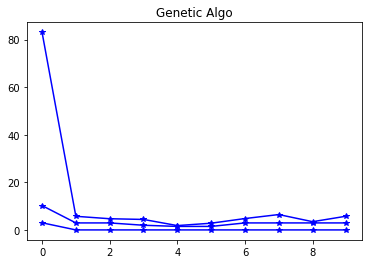

('For POPULATION size', 50, 'and iteration ', 20)
[0.7000000000000001, 1.99, 0.99, 0.7000000000000001, 1.7]


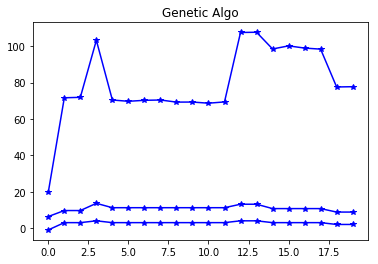

('For POPULATION size', 50, 'and iteration ', 50)
[0.99, 0.0, 0.7000000000000001, 0.99, 0.99]


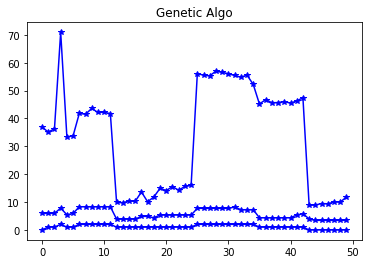

('For POPULATION size', 50, 'and iteration ', 100)
[0.7000000000000001, -2.0, 0.7000000000000001, 0.0, 0.99]


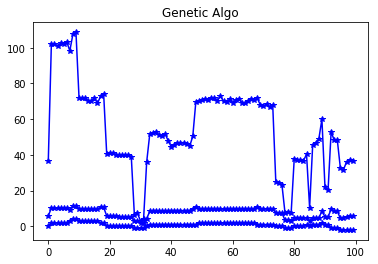

('For POPULATION size', 50, 'and iteration ', 200)
[0.7000000000000001, 1.7, 0.7000000000000001, 0.0, 1.7]


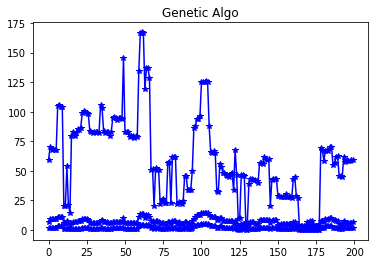

('For POPULATION size', 50, 'and iteration ', 500)
[1.99, 0.99, 1.99, 1.7, 0.99]


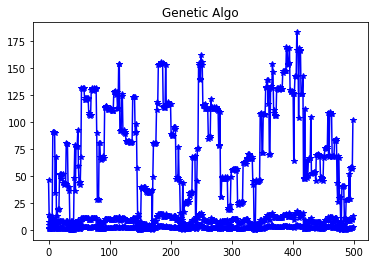

('For POPULATION size', 100, 'and iteration ', 10)
[0.0, 0.0, 0.0, 0.7000000000000001, 0.7000000000000001]


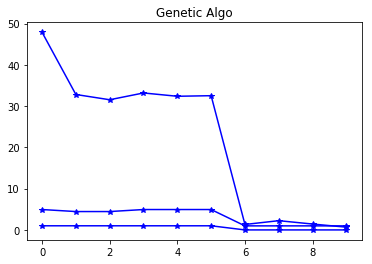

('For POPULATION size', 100, 'and iteration ', 20)
[1.7, 1.99, 0.0, 1.7, 1.7]


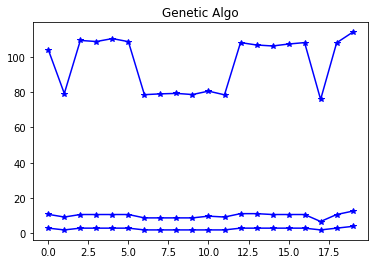

('For POPULATION size', 100, 'and iteration ', 50)
[1.7, 1.7, 1.7, 0.99, 1.99]


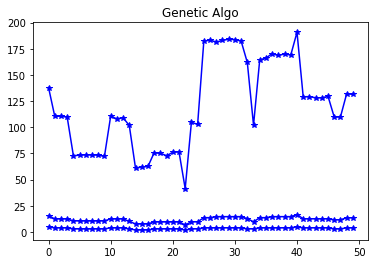

('For POPULATION size', 100, 'and iteration ', 100)
[-2.0, 1.99, 1.7, 0.0, 0.0]


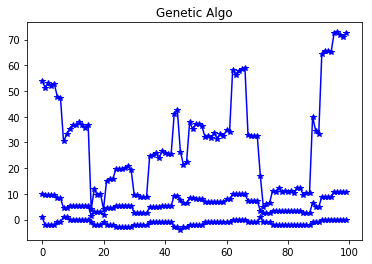

('For POPULATION size', 100, 'and iteration ', 200)
[1.99, 1.7, 1.99, 0.99, 0.0]


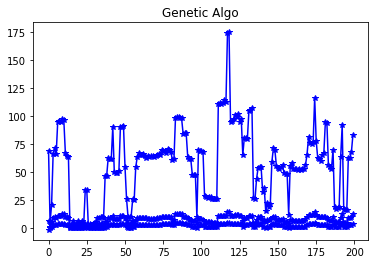

('For POPULATION size', 100, 'and iteration ', 500)
[0.0, -1.0, 0.99, 0.0, 1.99]


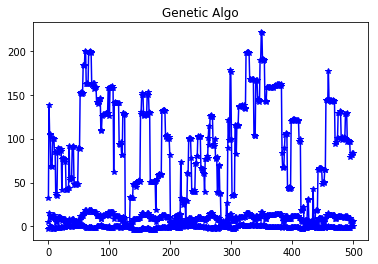

('For POPULATION size', 200, 'and iteration ', 10)
[0.99, 0.99, 0.0, 0.0, 0.7000000000000001]


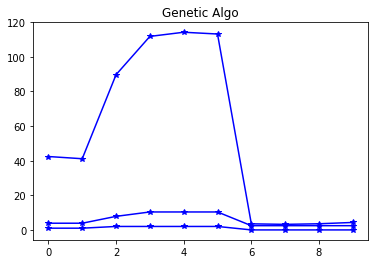

('For POPULATION size', 200, 'and iteration ', 20)
[0.7000000000000001, 0.0, 0.99, 0.0, 0.0]


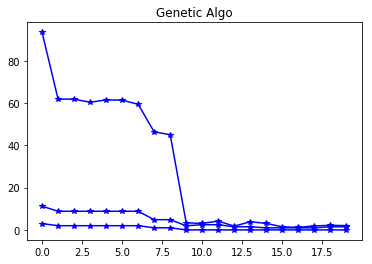

('For POPULATION size', 200, 'and iteration ', 50)
[0.99, -1.0, 1.99, 0.0, -2.0]


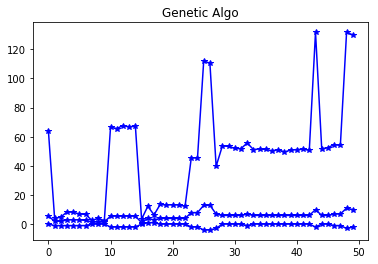

('For POPULATION size', 200, 'and iteration ', 100)
[0.99, 1.99, 1.7, 0.7000000000000001, 0.7000000000000001]


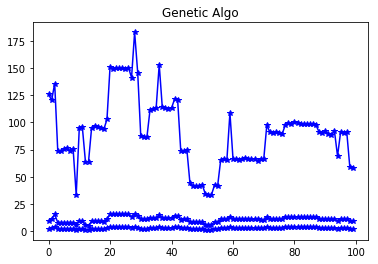

('For POPULATION size', 200, 'and iteration ', 200)
[1.7, 0.99, 1.7, 0.99, 1.99]


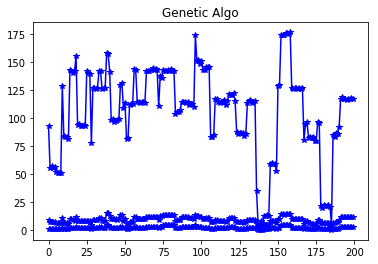

('For POPULATION size', 200, 'and iteration ', 500)
[0.7000000000000001, 0.99, 0.0, 0.0, 0.99]


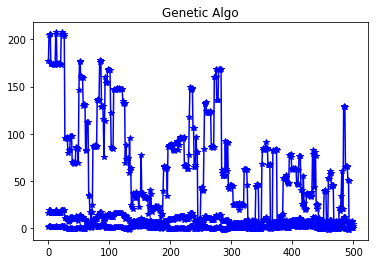

In [23]:
#=============================== FUN FOR CROSSOVER ====================================#
def crossover(string1, string2, N):
	while True:
		child=[]
		for i in range(10):
			if(i==0):
				prob =random.random()
				if(prob<0.5):
					child.append(string1[i])
				else:
					child.append(string2[i])
			elif(i==3):
				child.append('.')
			else:
				prob = random.random()
				if(prob < 0.7 ):
					child.append(string1[i])
				elif(prob < 0.9 ):
					child.append(string2[i])
				else:
					child.append(mutation())
		child=''.join(child)
		N=binary_to_floltingPoint(child)
		if(N<=2.04 and N>=-2.04):
			break
	return child




#=============================== FUNC FOR GENTETIC ALGORITHM ====================================#
def genetic_algorith():
	popu_size=[50,100,200]
	for k in  range(3):
		iteration=[10,20,50,100,200,500]
		for b in range(6):
			iter_value=iteration[b]
			POPULATION_size=popu_size[k]
			POPULATION=[]
			for i in range(POPULATION_size):
				string=[]
				for j in range(5):
					string.append(POPULATE_POPU(len_popu))
				POPULATION.append(string)
			generation=1

			
		
			plot=[]
			
			for i in range (iter_value):
				POPULATION,plot1=FITNESS_FUNC(POPULATION,POPULATION_size)
				plot.append(plot1)
				new_gen=[]
				for j in range(POPULATION_size):
					string1=POPULATION[0]
					string2=POPULATION[1]
					new_string=[]
					for l in range(5):
						stringt=crossover(string1[l],string2[l],len_popu)
						new_string.append(stringt)
						new_gen.append(new_string)
				POPULATION1=POPULATION
				POPULATION=new_gen
				generation += 1
			value=[]
			for a in range(5):
				value.append(binary_to_floltingPoint(POPULATION1[0][a]))
			print( "For POPULATION size",POPULATION_size,"and iteration ",iter_value)
			print (value)
			plt.plot(range(iter_value),plot,c='blue', marker = "*")
			plt.title("Genetic Algo")
			plt.show()
																											
genetic_algorith()

('For', 10, 'iteration')
[-1.8, 0.93, -0.2, 0.36, -1.58]




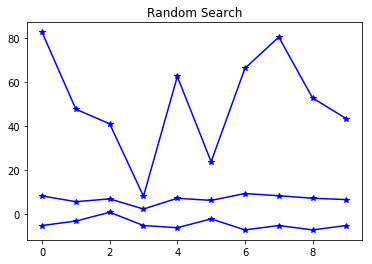

('For', 20, 'iteration')
[1.1, -1.1400000000000001, 0.8, 0.49, 1.83]




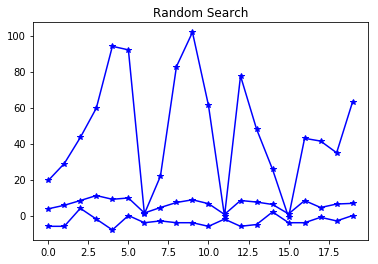

('For', 50, 'iteration')
[-1.18, -0.02, 0.47000000000000003, 1.26, 1.73]




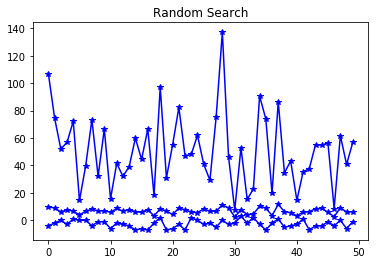

('For', 100, 'iteration')
[-1.6400000000000001, -1.6, -0.46, 1.6400000000000001, -0.15]




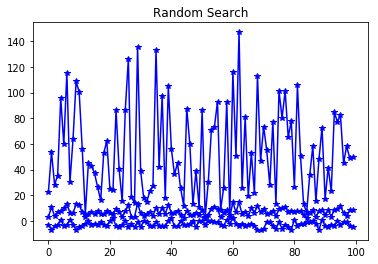

('For', 200, 'iteration')
[1.87, 0.38, -0.56, 1.3, 0.43]




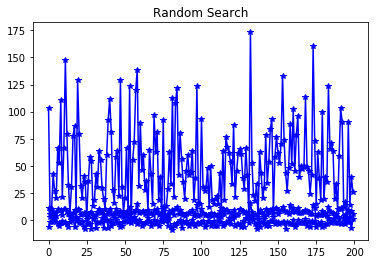

('For', 500, 'iteration')
[-1.18, -1.77, -1.6, -1.54, -1.98]




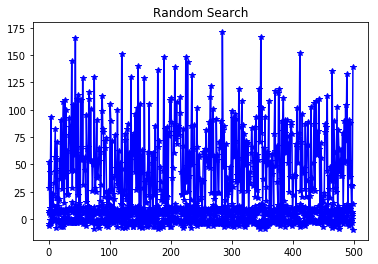

In [24]:
#========================================================== Random Search =============================================#
iteration=[10,20,50,100,200,500]
for i in range(6):
	f=[]
	n=[]
	for k in range(5):
		n1=random.uniform(-2.04,2.04)
		n.append(n1)
	h1=0
	h2=0
	h3=0
	for l in range(5):
		h1=h1 + (n[l]*n[l])
		h2=h2 + math.floor(n[l])
		h3=h3 + ((l+1)*n[l]*n[l]*n[l]*n[l])
	h3 = h3 + np.random.normal(0,1)
	f.append([h1,h2,h3])
	optimal=n
	for j in range(1,iteration[i]):
		n=[]
		for k in range(5):
			n1=random.uniform(-2.04,2.04)
			n.append(n1)
		f1=0
		f2=0
		f3=0
		for l in range(5):
			f1=f1 + (n[l]*n[l])
			f2=f2 + math.floor(n[l])
			f3=f3 + ((l+1)*n[l]*n[l]*n[l]*n[l])
		f3 = f3 + np.random.normal(0,1)
		if(f1<=h1 and f2<=h2 and f3<=h3):
			if(f1<h1 or f2<h2 or f3<h3):
				h1=f1
				h2=f2
				h3=f3
				optimal=n
		f.append([f1,f2,f3])

	for k in range(5):
		n[k]=n[k]-(n[k]%0.01)
	print( "For",iteration[i],"iteration")
	print (n)
	print ("\n")
	plt.plot(range(iteration[i]),f,c='blue', marker = "*")
	plt.ylabel=("function value")
	plt.xlabel=("iteration")
	plt.title("Random Search")
	plt.show()